<a href="https://colab.research.google.com/github/MbogoriL/regression-analysis/blob/main/Regression_Analysis_with_Python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [4]:
house = pd.read_csv('house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# check dataset shape
house.shape

(21613, 21)

In [ ]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [5]:
house = house.drop(columns = ['id', 'date'])

In [6]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [7]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [ ]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

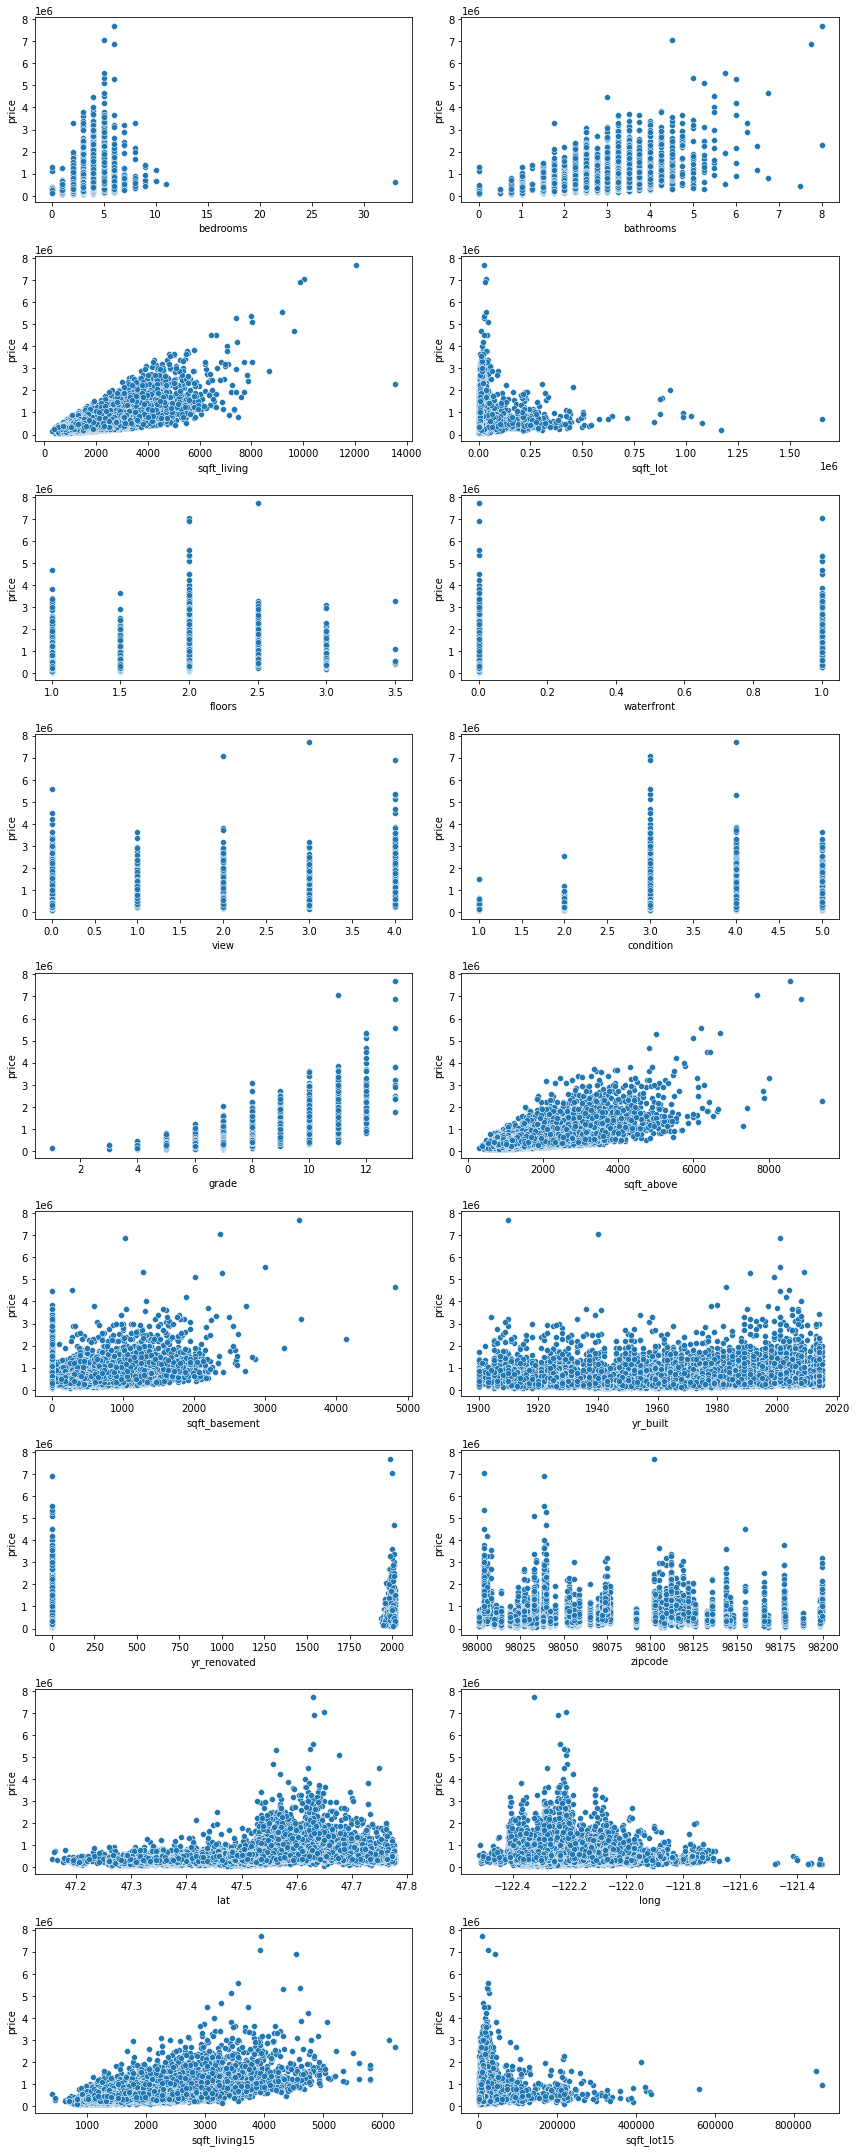

In [ ]:
# creating scatterplots to observe the relationship between price and the variables
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?

- The 'sqft' features have a clear linear relationship with the price.

- There are outliers within all the features observations

### 3.2 Checking for outliers

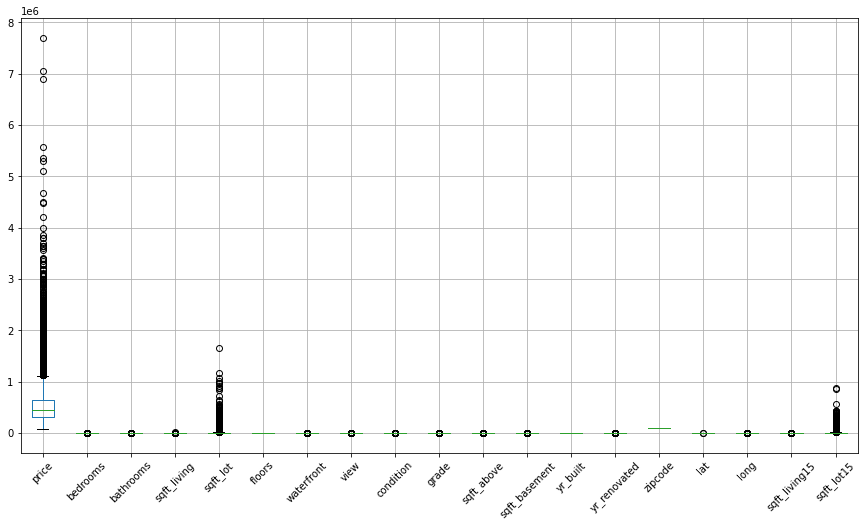

In [10]:
# create a boxplot to visualize the outliers
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
IQR
Q1
Q3
qcalc = Q1 - 1.5 * IQR
qcalc

# Then filtering out our outliers by getting values which are outside our IQR Range.
outliers_iqr = house[((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the size of the dataset with outliers for cleaning purposes
outliers_iqr.shape

plt.figure(figsize = (15, 8))
house.boxplot(rot=45)
plt.show()

What observations can you make? What actions are you going to take next?

The price, sqft_lot, sqft_lot15 have the highest range of values.

### 3.3 Checking multicollinearity

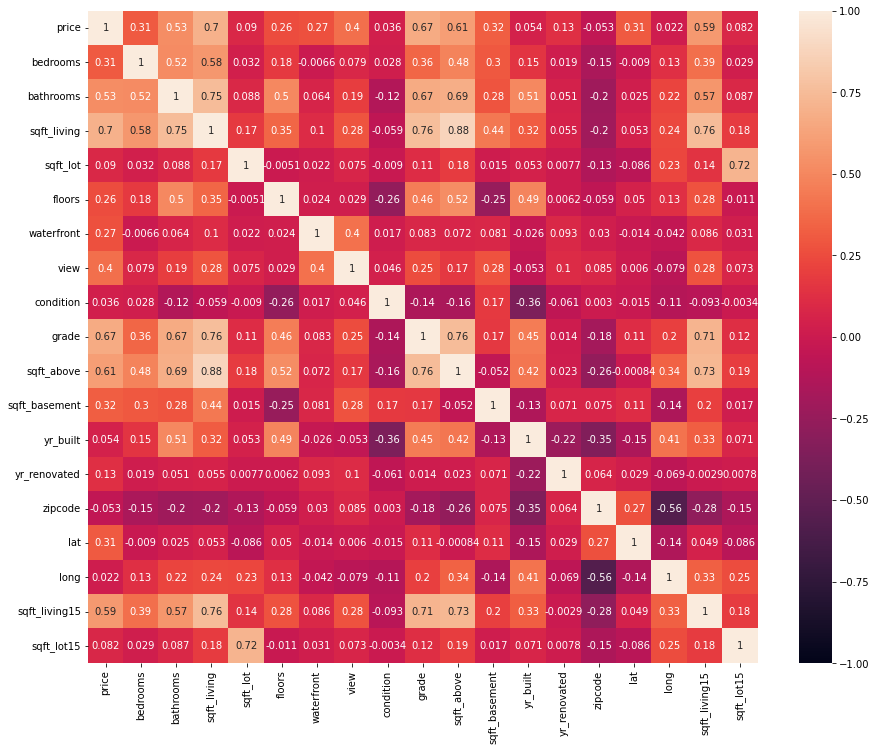

In [ ]:
# create a heatmap of the correlations
corr = house.corr()
corr
plt.figure(figsize=(15, 12))
# Render   
sns.heatmap(corr, annot = True, vmin = -1 , vmax = 1)

# Display
plt.show()

In [ ]:
# check VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

#dataset with independent variables
X = house.drop(['price'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature           VIF
0        bedrooms  2.327113e+01
1       bathrooms  2.861125e+01
2     sqft_living           inf
3        sqft_lot  2.377671e+00
4          floors  1.689313e+01
5      waterfront  1.213032e+00
6            view  1.551931e+00
7       condition  3.470856e+01
8           grade  1.474317e+02
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built  9.586838e+03
12   yr_renovated  1.194942e+00
13        zipcode  1.630635e+06
14            lat  1.390023e+05
15           long  1.359460e+06
16  sqft_living15  2.710092e+01
17     sqft_lot15  2.598730e+00


What have you noticed? What actions are you going to take next regarding this?

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# split into features (X) and label (Y)
X = house.drop(['price'], axis=1)
Y = house['price']

In [ ]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17286 entries, 20761 to 2732
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17286 non-null  int64  
 1   bathrooms      17286 non-null  float64
 2   sqft_living    17286 non-null  int64  
 3   sqft_lot       17286 non-null  int64  
 4   floors         17286 non-null  float64
 5   waterfront     17286 non-null  int64  
 6   view           17286 non-null  int64  
 7   condition      17286 non-null  int64  
 8   grade          17286 non-null  int64  
 9   sqft_above     17286 non-null  int64  
 10  sqft_basement  17286 non-null  int64  
 11  yr_built       17286 non-null  int64  
 12  yr_renovated   17286 non-null  int64  
 13  zipcode        17286 non-null  int64  
 14  lat            17286 non-null  float64
 15  long           17286 non-null  float64
 16  sqft_living15  17286 non-null  int64  
 17  sqft_lot15     17286 non-null  int64  
dtypes: 

In [ ]:
# fit regressor to data and make predictions
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# evaluate RMSE and r-squared scores
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(rmse)

194793.60017042913


What conclusions have you drawn?

### 4.1 Test for normality and homoscedasticity

Text(0, 0.5, 'Residuals')

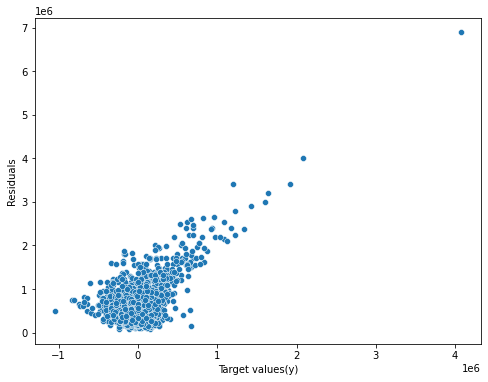

In [ ]:
# create a dataframe of residuals
res = y_test - y_pred

res_df = pd.DataFrame(res)
res_df.head()

# plotting our residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=res, y=y_test)
plt.xlabel("Target values(y)")
plt.ylabel("Residuals")

What is your interpretation of the residual plot?

- The residuals follow a pattern of homoscedasticity because the errors are spread evenly across the predicted values.

In [ ]:
import scipy as sp
from scipy.stats import bartlett

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = bartlett(res,y_test)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

Critical value: inf


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 203462.39842444344

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 214570.85263086384

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 226992.0524746688

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 237242.50639842812

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 252003.32398596578

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 262521.45939713

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 297065.65618053585

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 285006.87164279475

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 308373.3740209355

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 124911.56443920659

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 120088.84696508915

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [ ]:
from sklearn.metrics import r2_score
print("Ada Boosting R-squared Score:",r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:",r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:",r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: 0.2185516113770939
Gradient Boosting R-squared Score: 0.8431130555684335
XG Boosting R-squared Score: 0.8443698930826004


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.